[Applied Plotting, Charting & Data Representation in Python](https://www.coursera.org/learn/python-plotting/home)

# Matplotlib Architecture

### Backend Layer
- Deals with the rendering of plots to screen or files
- In Jupyter notebook generally use "inline" backend

### Artist Layer
- Contains containers such as Figure, Subplot and Axes
- Contains primitives such as Line2D, Rectangle, and collections such as PathCollection

### Scripting Layer
- Simplified access to the Artist and Backend layer
- such as pyplot


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib notebook

# Scatterplots

<IPython.core.display.Javascript object>


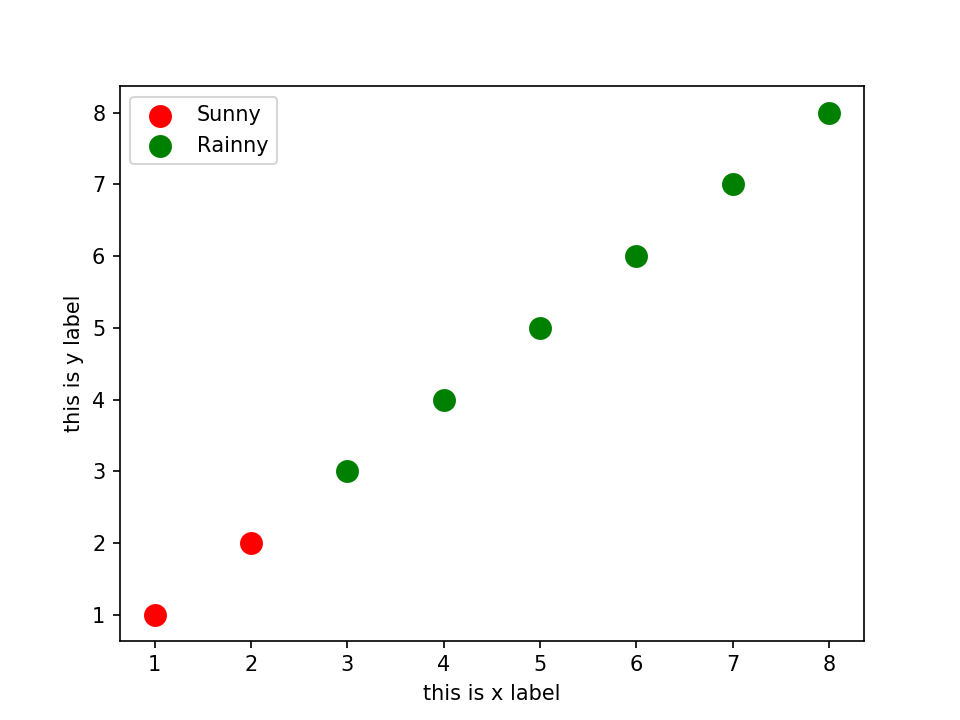

In [10]:
x = np.array(range(1, 9))
y = x

plt.figure()
plt.scatter(x[:2], y[:2], s=100, c='red', label='Sunny')
plt.scatter(x[2:], y[2:], s=100, c='green', label='Rainny')
plt.xlabel('this is x label')
plt.ylabel('this is y label')
plt.legend()

In [11]:
plt.gca().get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

# Line Plots

<IPython.core.display.Javascript object>


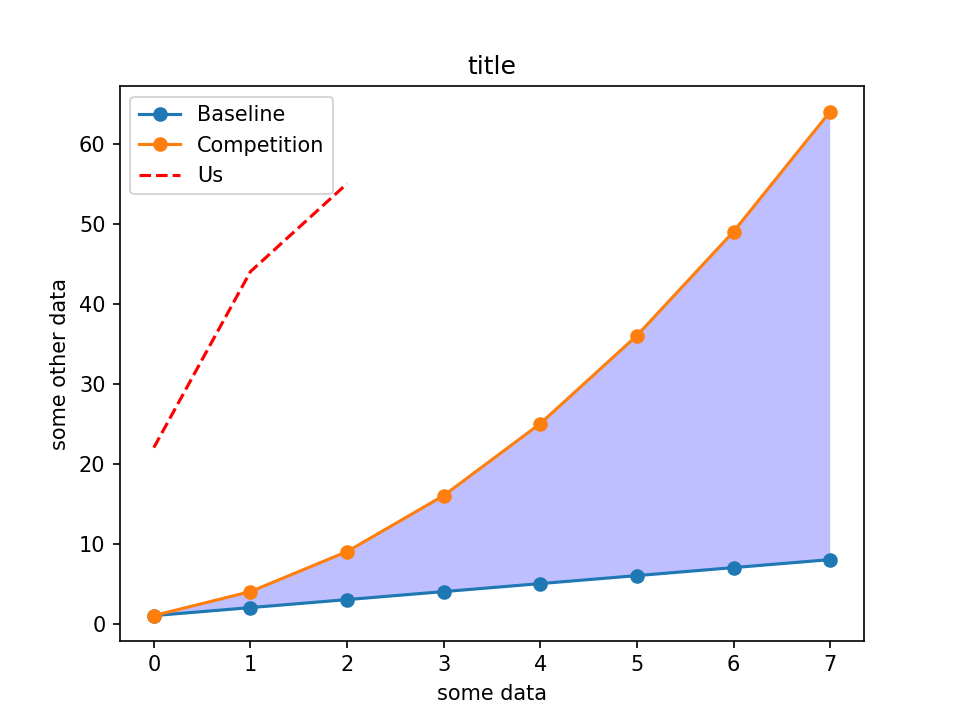

In [12]:
linear_data = np.array(range(1, 9))
quadratic_data = linear_data ** 2

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')

In [13]:
plt.plot([22, 44, 55], '--r')

In [14]:
plt.xlabel('some data')
plt.ylabel('some other data')
plt.title('title')
plt.legend(['Baseline', 'Competition', 'Us'])

### gca() : get current axes

In [15]:
plt.gca().fill_between(range(len(linear_data)),
                      linear_data, quadratic_data, 
                      facecolor='blue',
                      alpha=0.25)

<IPython.core.display.Javascript object>


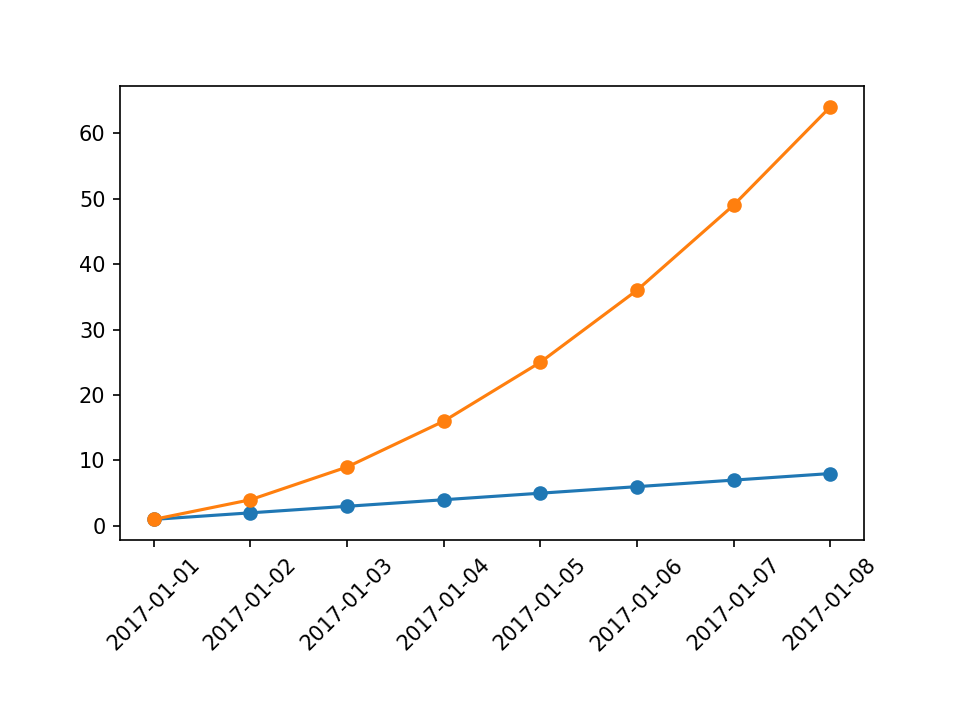

In [20]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o',
        observation_dates, quadratic_data, '-o')

In [21]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

In [22]:
plt.subplots_adjust(bottom=0.25)

# Bar Charts

<IPython.core.display.Javascript object>


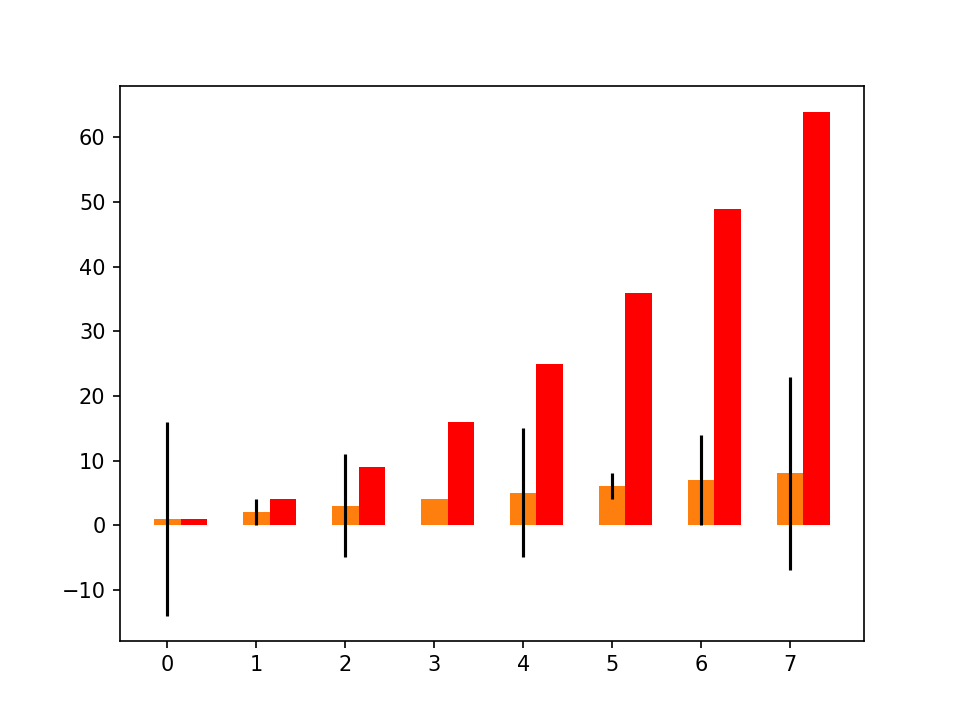

<Container object of 8 artists>

In [29]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width=0.3)

In [31]:
# frustrating, you have to calculate x offset yourself
new_xvals = [x + 0.3 for x in xvals]
plt.bar(new_xvals, quadratic_data, width=0.3, color='red')

<Container object of 8 artists>

In [33]:
from random import randint

linear_err = [randint(0, 15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width=0.3, yerr=linear_err)

<Container object of 8 artists>

<IPython.core.display.Javascript object>


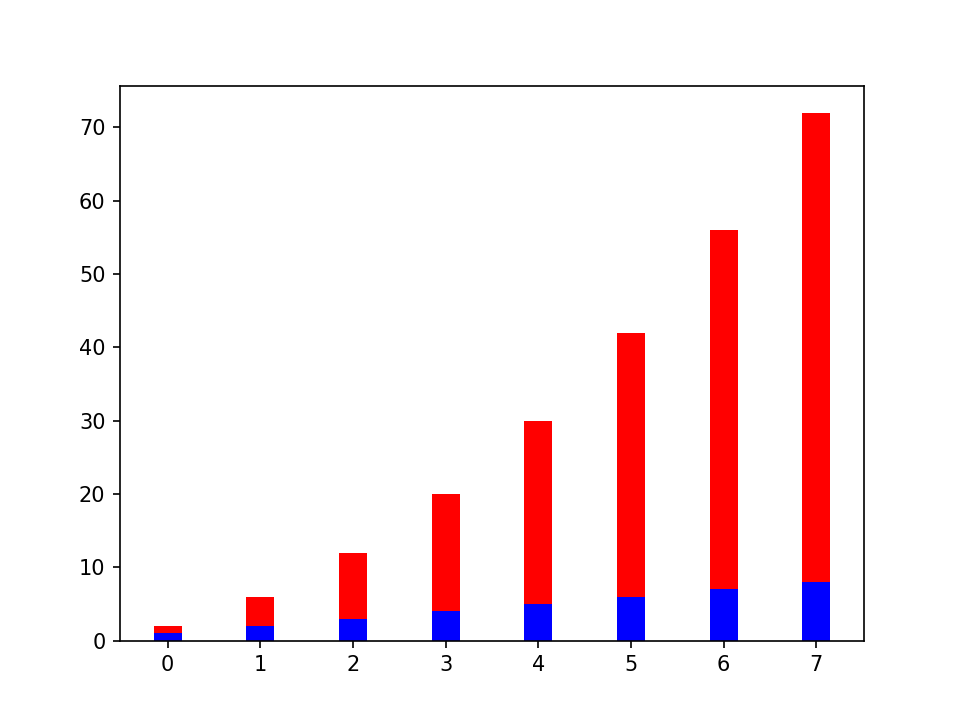

<Container object of 8 artists>

In [34]:
plt.figure()
plt.bar(xvals, linear_data, width=0.3, color='b')
plt.bar(xvals, quadratic_data, width=0.3, color='r', bottom=linear_data)

<IPython.core.display.Javascript object>


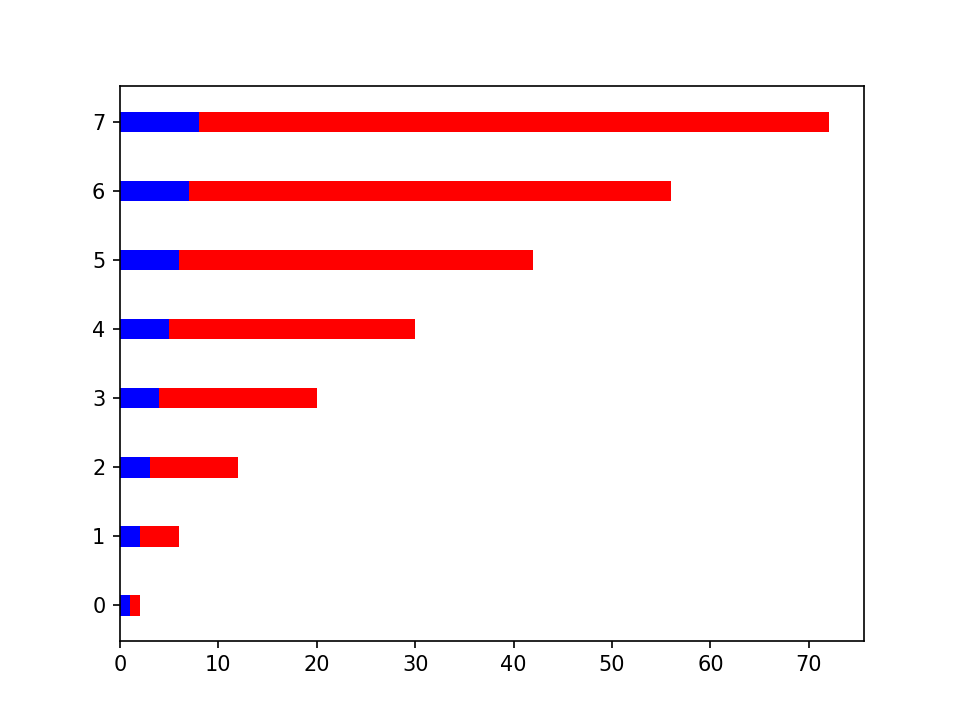

<Container object of 8 artists>

In [35]:
plt.figure()
plt.barh(xvals, linear_data, height=0.3, color='b')
plt.barh(xvals, quadratic_data, height=0.3, color='r', left=linear_data)

# Dejunkifying a Plot

<IPython.core.display.Javascript object>


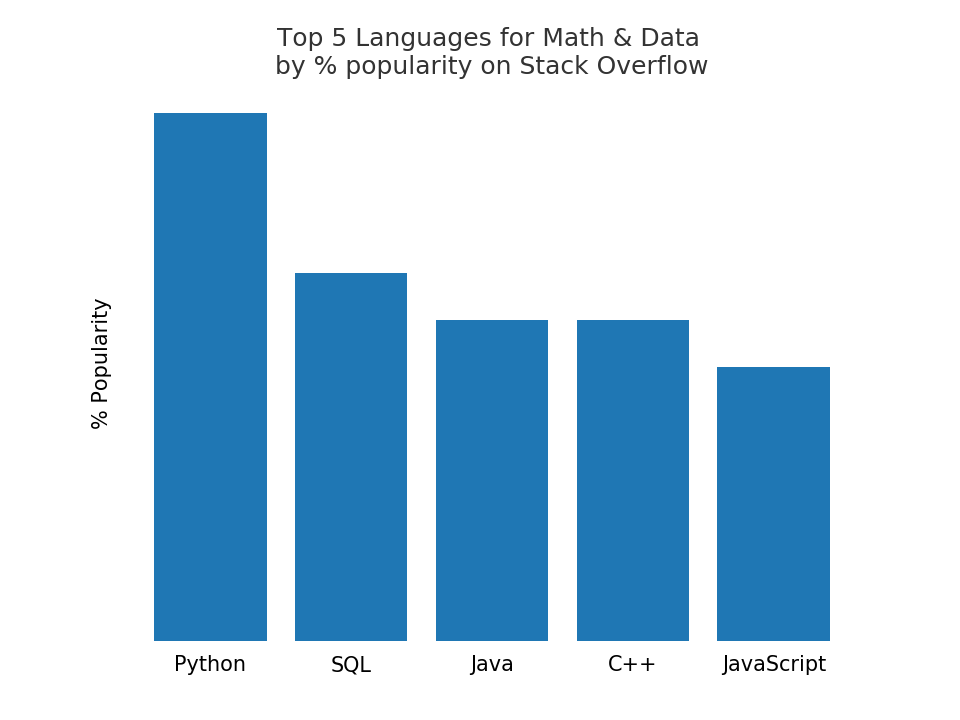

Text(0.5,1,'Top 5 Languages for Math & Data \nby % popularity on Stack Overflow')

In [44]:
import numpy as np

%matplotlib notebook

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

### Remove ticks

In [45]:
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

### Remove spines

In [46]:
for spine in plt.gca().spines.values():
    spine.set_visible(False)

### Make your target stand out

<IPython.core.display.Javascript object>


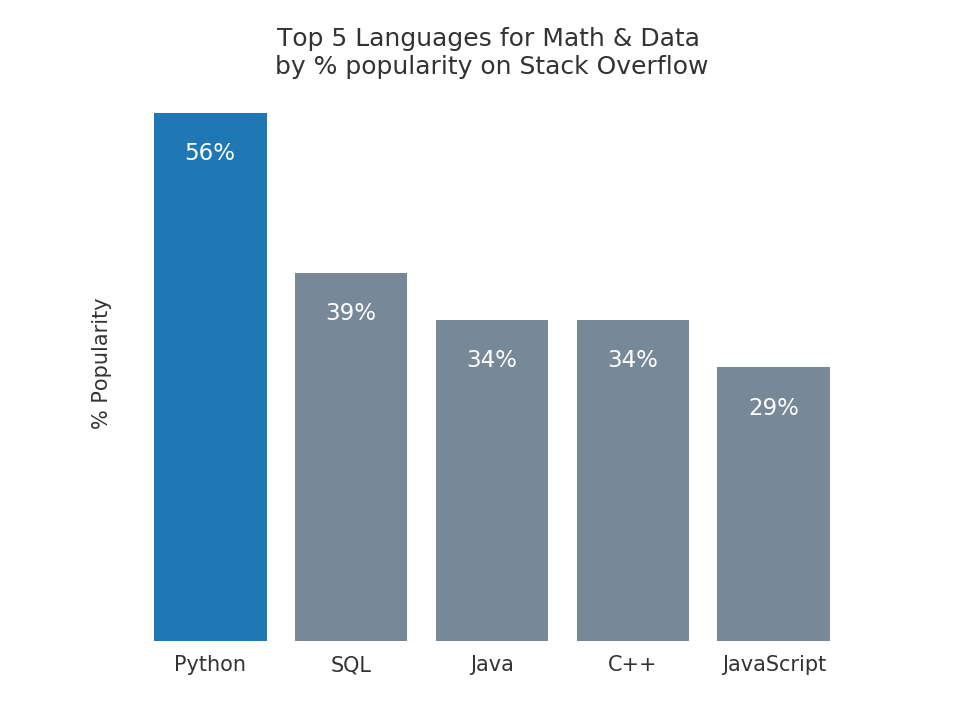

In [47]:
plt.figure()

bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

### Directly label each bar

In [49]:
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, 
                   bar.get_height() - 5,
                   str(int(bar.get_height())) + '%',
                   ha='center',
                   color='w',
                   fontsize=11)
plt.show()

# Subplots

In [50]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

<IPython.core.display.Javascript object>


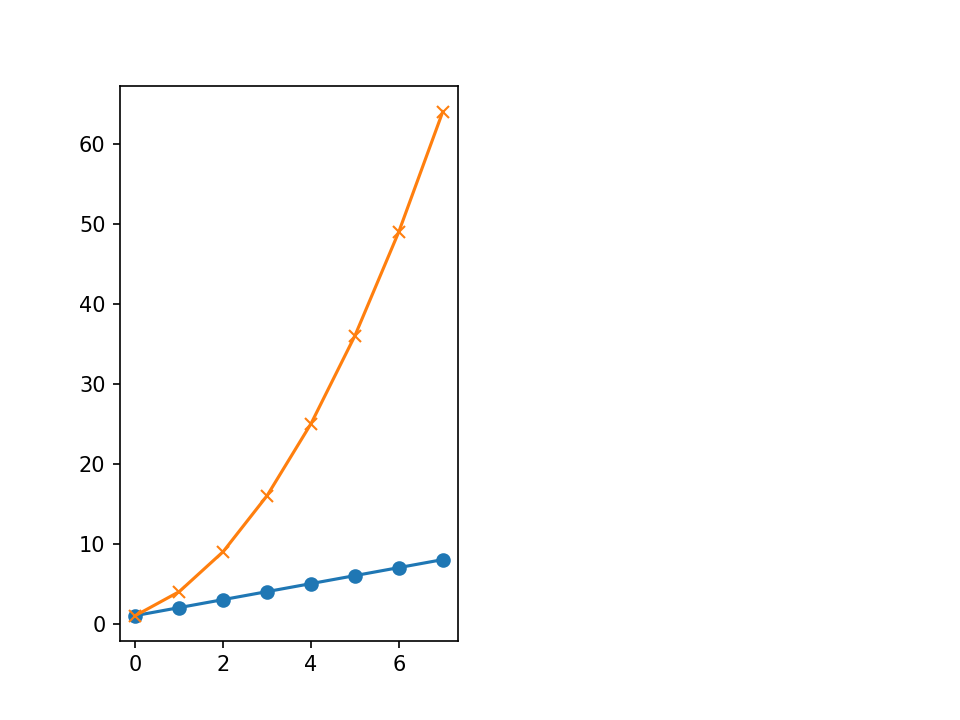

In [55]:
linear_data = np.array(range(1, 9))
quadratic_data = linear_data ** 2

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

In [56]:
plt.plot(quadratic_data, '-x')

<IPython.core.display.Javascript object>


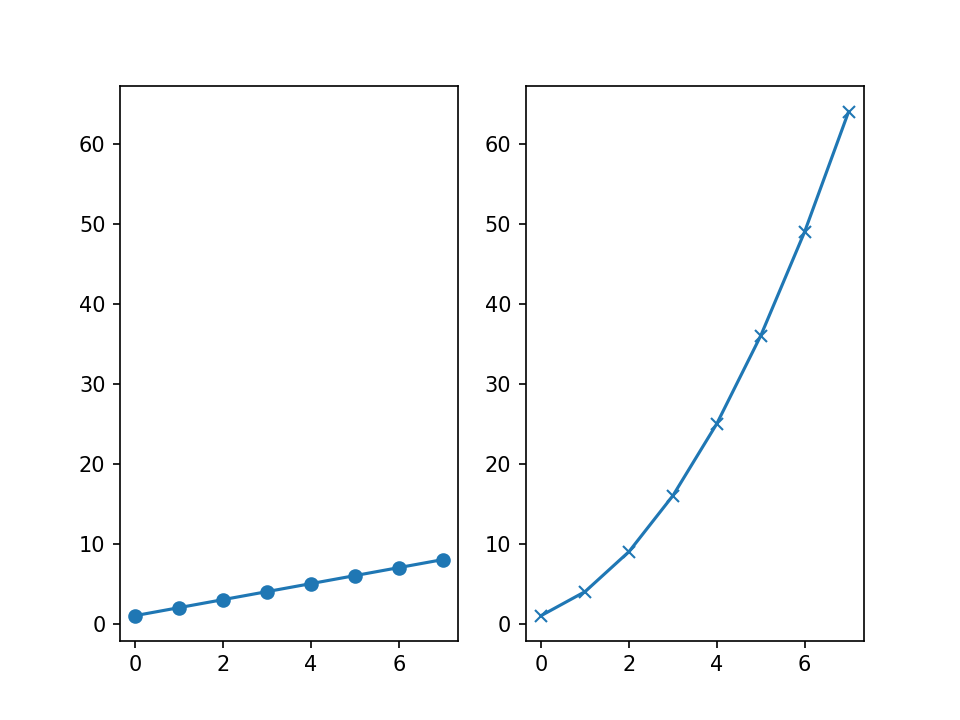

In [59]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(quadratic_data, '-x')

<IPython.core.display.Javascript object>


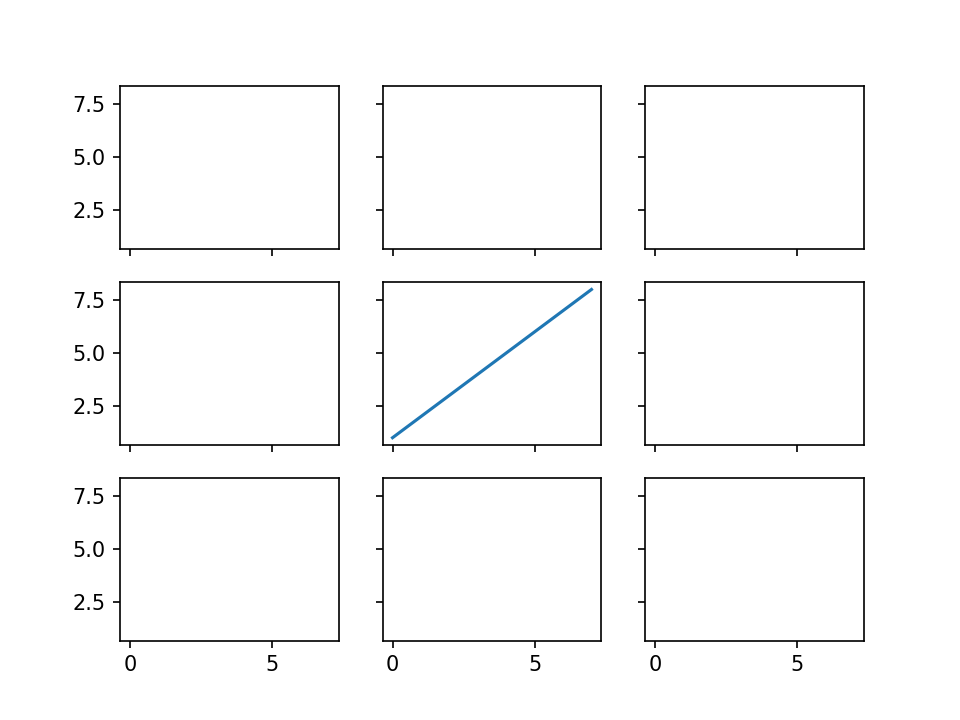

In [60]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)

ax5.plot(linear_data, '-')

# Histogram

<IPython.core.display.Javascript object>


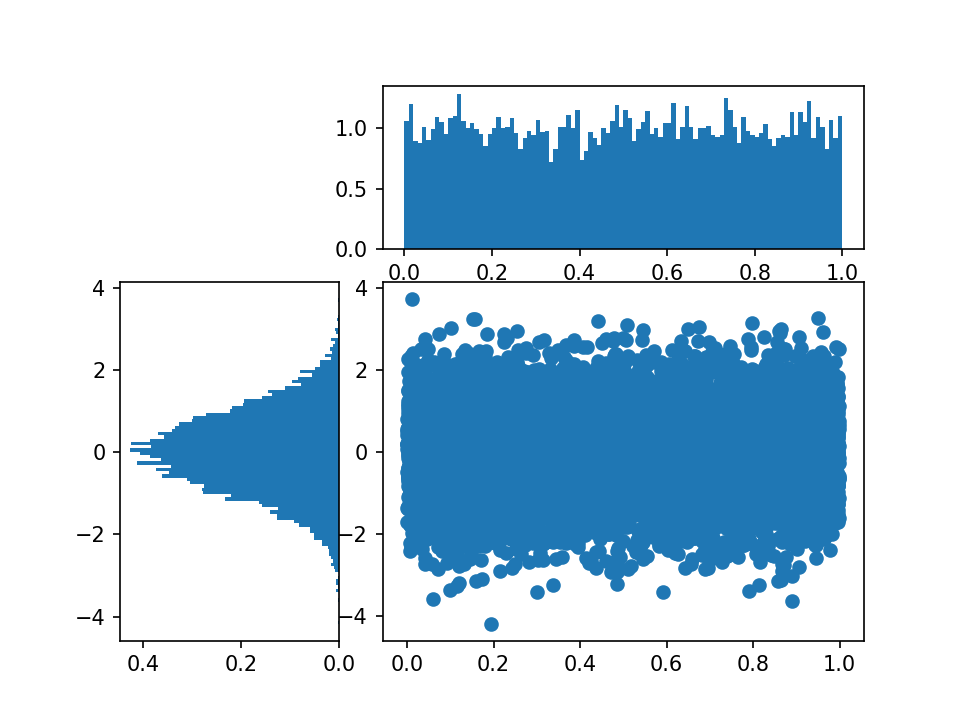

In [68]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [69]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [70]:
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)

side_histogram.invert_xaxis()

# Box Plots

In [71]:
import pandas as pd

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                   'random': random_sample,
                   'gamma': gamma_sample})

df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.994604,0.016920,0.496221
std,1.398745,1.000010,0.288728
min,0.007232,-3.244295,0.000055
25%,0.988285,-0.646745,0.251210
50%,1.684765,0.017173,0.498078
75%,2.655737,0.691121,0.745188
max,14.762887,3.745312,0.999838


<IPython.core.display.Javascript object>


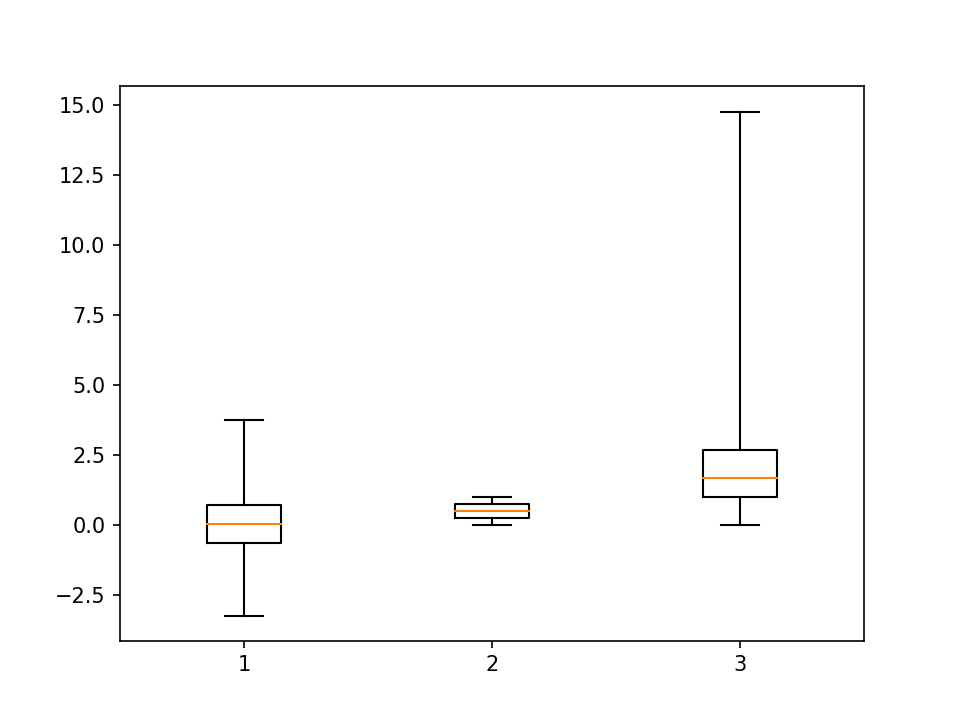

In [72]:
plt.figure()
_ = plt.boxplot(df['normal'], whis='range')

In [74]:
plt.clf()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


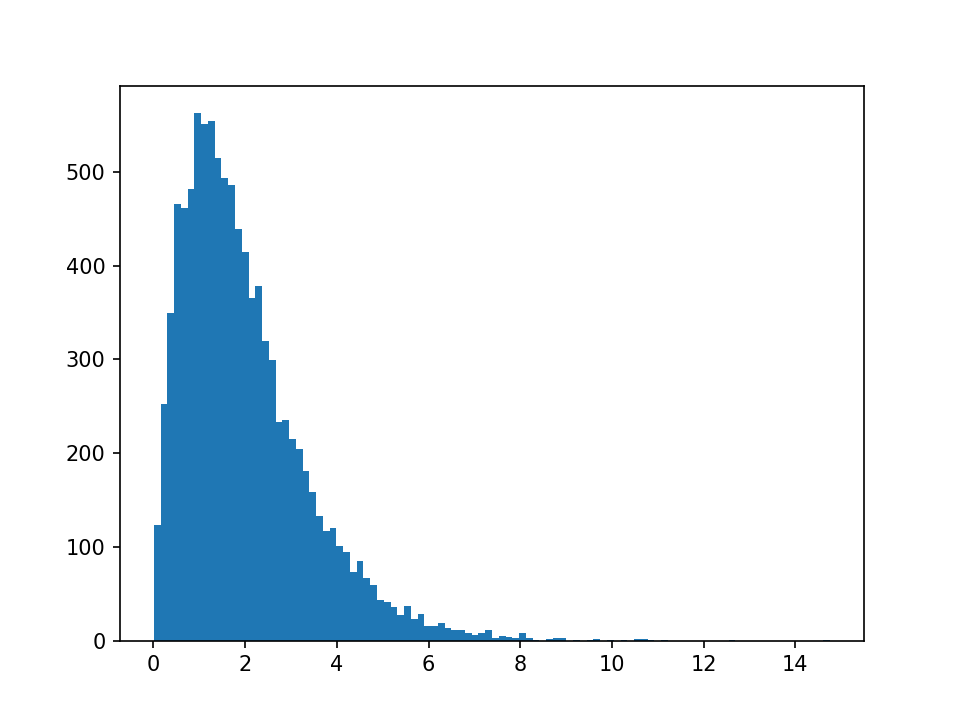

In [75]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


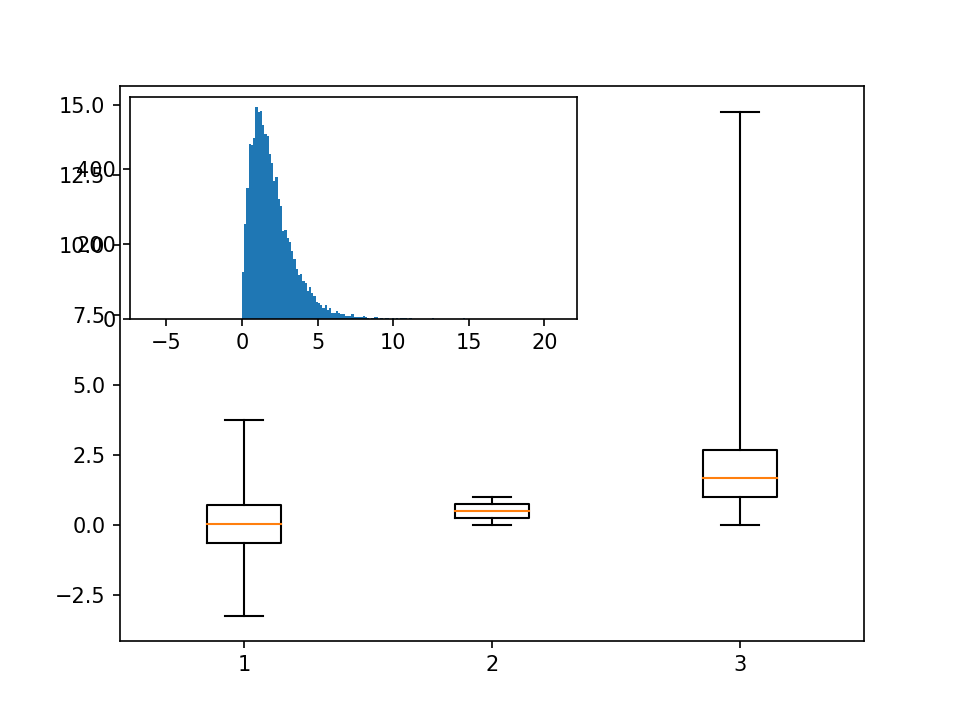

In [77]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()

plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

# Heatmaps

<IPython.core.display.Javascript object>


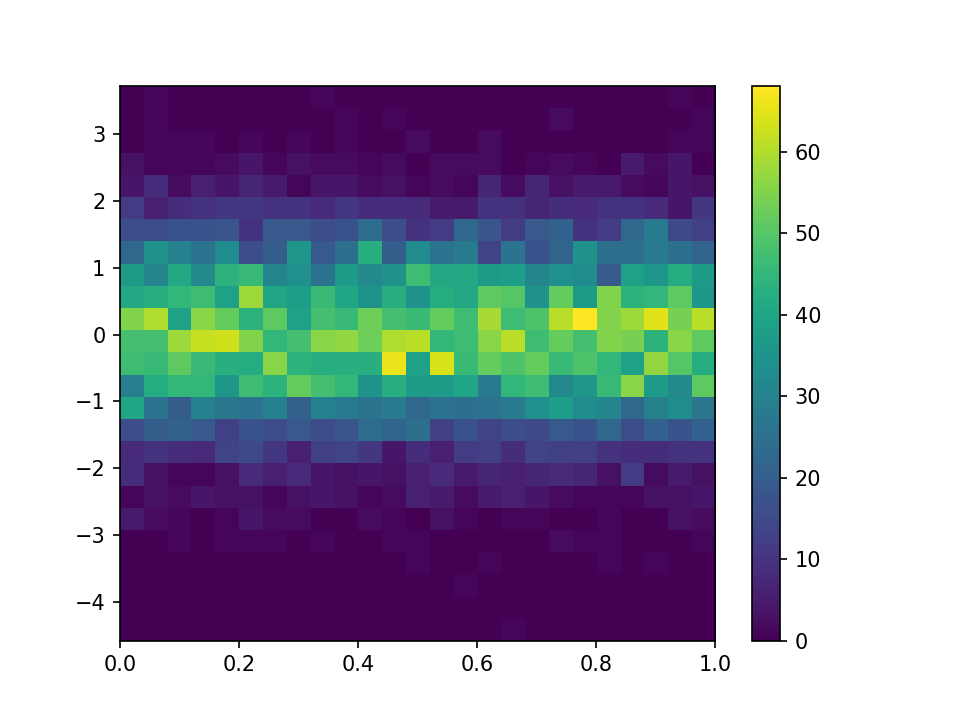

In [78]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

In [79]:
plt.colorbar()

# Animations

In [80]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [81]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


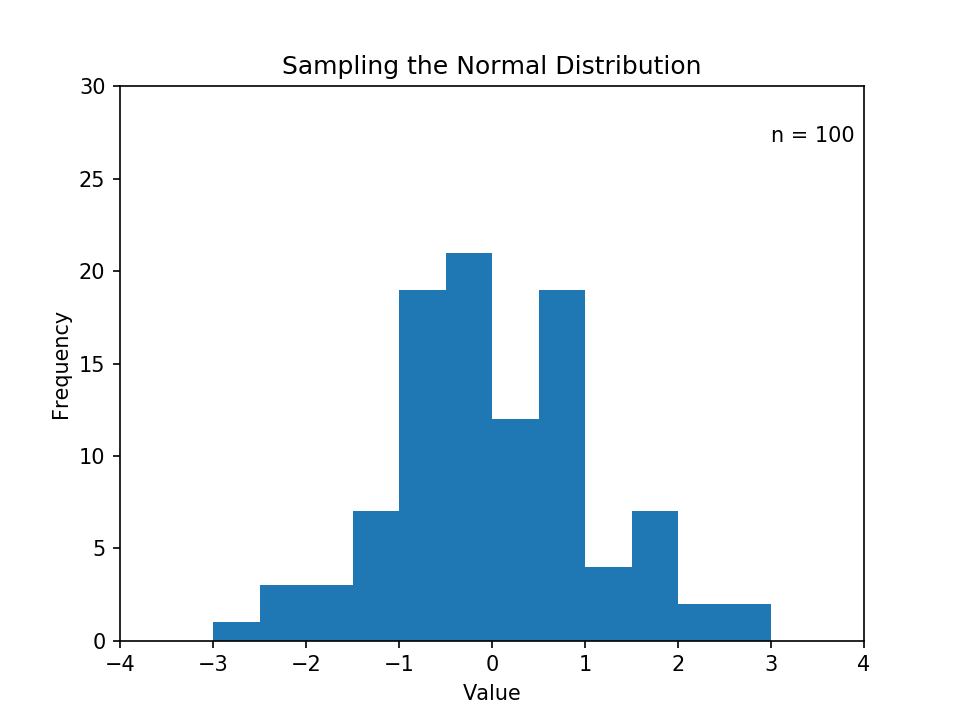

In [82]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)